<a href="https://colab.research.google.com/github/batista7557/Python-para-Finan-as---Aula-01/blob/main/Python_para_Finan%C3%A7as.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Python Para Finanças

In [2]:
!pip install -q yfinance

     |████████████████████████████████| 62 kB 382 kB/s 


Importação das Bibliotecas

In [3]:
import pandas as pd
import numpy as np
from pandas_datareader import data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import yfinance as yf

Base de dados com uma ação

In [38]:
gol_df = yf.download("GOLL4.SA", start='2015-01-01') #Ações da Gol (SP) de 2015 até os dias atuais

[*********************100%***********************]  1 of 1 completed


In [8]:
gol_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,14.97,15.20,14.61,14.99,14.99,901900
2015-01-05,14.90,15.01,14.41,14.85,14.85,1272500
2015-01-06,14.75,15.21,14.65,15.21,15.21,2183500
2015-01-07,15.15,15.33,14.55,14.55,14.55,1846900
2015-01-08,14.41,14.65,14.20,14.27,14.27,1569500
...,...,...,...,...,...,...
2022-10-31,8.55,9.67,8.51,9.61,9.61,19472100
2022-11-01,9.65,10.05,9.33,9.90,9.90,16485300
2022-11-03,9.62,9.95,9.35,9.93,9.93,14876400


In [9]:
gol_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1951 entries, 2015-01-02 to 2022-11-07
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1951 non-null   float64
 1   High       1951 non-null   float64
 2   Low        1951 non-null   float64
 3   Close      1951 non-null   float64
 4   Adj Close  1951 non-null   float64
 5   Volume     1951 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 106.7 KB


In [10]:
gol_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,14.97,15.20,14.61,14.99,14.99,901900
2015-01-05,14.90,15.01,14.41,14.85,14.85,1272500
2015-01-06,14.75,15.21,14.65,15.21,15.21,2183500
2015-01-07,15.15,15.33,14.55,14.55,14.55,1846900
2015-01-08,14.41,14.65,14.20,14.27,14.27,1569500


In [11]:
gol_df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-10-31,8.55,9.67,8.51,9.61,9.61,19472100
2022-11-01,9.65,10.05,9.33,9.90,9.90,16485300
2022-11-03,9.62,9.95,9.35,9.93,9.93,14876400
2022-11-04,10.06,10.27,9.84,9.95,9.95,14851600
2022-11-07,9.98,10.15,9.31,9.35,9.35,12203200


In [12]:
gol_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1951.000000,1951.000000,1951.000000,1951.000000,1951.000000,1.951000e+03
mean,15.492624,15.872594,15.090354,15.453316,15.453316,5.486323e+06
std,9.368008,9.539805,9.188295,9.360926,9.360926,4.928363e+06
min,1.160000,1.180000,1.130000,1.160000,1.160000,0.000000e+00
25%,8.000000,8.205000,7.810000,7.955000,7.955000,2.139400e+06
50%,14.240000,14.600000,13.800000,14.210000,14.210000,4.028500e+06
75%,21.210000,21.780001,20.665000,21.200001,21.200001,7.166550e+06
max,43.669998,44.619999,41.310001,43.790001,43.790001,4.368050e+07


In [13]:
gol_df[gol_df['Close'] >= 43.79]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-08-01,41.25,44.619999,41.25,43.790001,43.790001,6664200


In [39]:
gol_df.to_csv('gol.csv') #Exporta para csv

Base de dados com mais ações

In [40]:
acoes = ['GOLL4.SA', 'CVCB3.SA', 'WEGE3.SA', 'MGLU3.SA', 'TOTS3.SA', 'BOVA11.SA'] #Recebe ações de mais empresas

In [16]:
acoes_df = pd.DataFrame()
for acao in acoes:
  acoes_df[acao] = yf.download(acao,start='2015-01-01')['Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [17]:
acoes_df

,GOLL4.SA,CVCB3.SA,WEGE3.SA,MGLU3.SA,TOTS3.SA,BOVA11.SA
Date,,,,,,
2015-01-02,14.99,15.20,5.923076,0.232812,11.910702,47.259998
2015-01-05,14.85,15.00,5.963461,0.237187,11.544731,46.320000
2015-01-06,15.21,14.80,5.875000,0.234062,10.822770,46.580002
2015-01-07,14.55,14.67,5.807692,0.241875,10.746248,48.150002
2015-01-08,14.27,14.15,5.905769,0.240000,10.995774,48.509998
...,...,...,...,...,...,...
2022-10-31,9.61,7.17,40.279999,4.470000,33.160000,112.150002
2022-11-01,9.90,7.41,39.410000,4.560000,32.110001,112.809998
2022-11-03,9.93,7.44,40.200001,4.870000,32.330002,113.099998


In [41]:
#Função para renomear para melhor visualização
acoes_df = acoes_df.rename(columns={'GOLL4.SA': 'GOL', 'CVCB3.SA': 'CVC', 'WEGE3.SA': 'WEGE',
                                    'MGLU3.SA': 'MGLU', 'TOTS3.SA': 'TOTS', 'BOVA11.SA': 'BOVA'})

In [19]:
acoes_df.head()

,GOL,CVC,WEGE,MGLU,TOTS,BOVA
Date,,,,,,
2015-01-02,14.99,15.20,5.923076,0.232812,11.910702,47.259998
2015-01-05,14.85,15.00,5.963461,0.237187,11.544731,46.320000
2015-01-06,15.21,14.80,5.875000,0.234062,10.822770,46.580002
2015-01-07,14.55,14.67,5.807692,0.241875,10.746248,48.150002
2015-01-08,14.27,14.15,5.905769,0.240000,10.995774,48.509998


In [20]:
acoes_df.isnull().sum()

GOL     0
CVC     0
WEGE    0
MGLU    0
TOTS    0
BOVA    0
dtype: int64

In [21]:
acoes_df.to_csv('acoes.csv')

In [22]:
acoes_df = pd.read_csv('acoes.csv')

In [42]:
acoes_df

,Date,GOL,CVC,WEGE,MGLU,TOTS,BOVA
0,2015-01-02,14.99,15.20,5.923076,0.232812,11.910702,47.259998
1,2015-01-05,14.85,15.00,5.963461,0.237187,11.544731,46.320000
2,2015-01-06,15.21,14.80,5.875000,0.234062,10.822770,46.580002
3,2015-01-07,14.55,14.67,5.807692,0.241875,10.746248,48.150002
4,2015-01-08,14.27,14.15,5.905769,0.240000,10.995774,48.509998
...,...,...,...,...,...,...,...
1946,2022-10-31,9.61,7.17,40.279999,4.470000,33.160000,112.150002
1947,2022-11-01,9.90,7.41,39.410000,4.560000,32.110001,112.809998
1948,2022-11-03,9.93,7.44,40.200001,4.870000,32.330002,113.099998
1949,2022-11-04,9.95,7.23,40.799999,4.830000,32.410000,114.000000


In [23]:
acoes_df.describe()

,GOL,CVC,WEGE,MGLU,TOTS,BOVA
count,1951.000000,1951.000000,1951.000000,1951.000000,1951.000000,1951.000000
mean,15.453316,28.479285,16.538412,6.825485,17.685294,81.394122
std,9.360926,16.077551,12.232382,7.689935,9.357488,23.957400
min,1.160000,6.090000,4.942307,0.030585,7.156402,36.450001
25%,7.955000,15.475000,6.717307,0.404804,10.044249,59.834999
50%,14.210000,22.209999,9.325000,4.030000,12.223442,82.440002
75%,21.200001,43.305000,29.405000,10.583750,26.585000,102.084999
max,43.790001,64.800003,46.105000,27.450001,40.599998,125.750000


Visualização

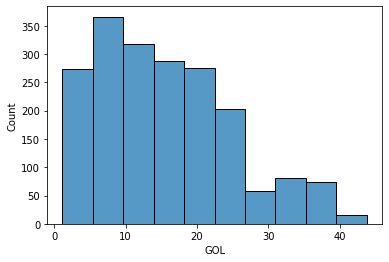

In [43]:
sns.histplot(acoes_df['GOL'], bins=10); #Histograma - Ações da Gol

In [25]:
len(acoes_df.columns)

7

In [26]:
np.arange(1, len(acoes_df.columns))

array([1, 2, 3, 4, 5, 6])

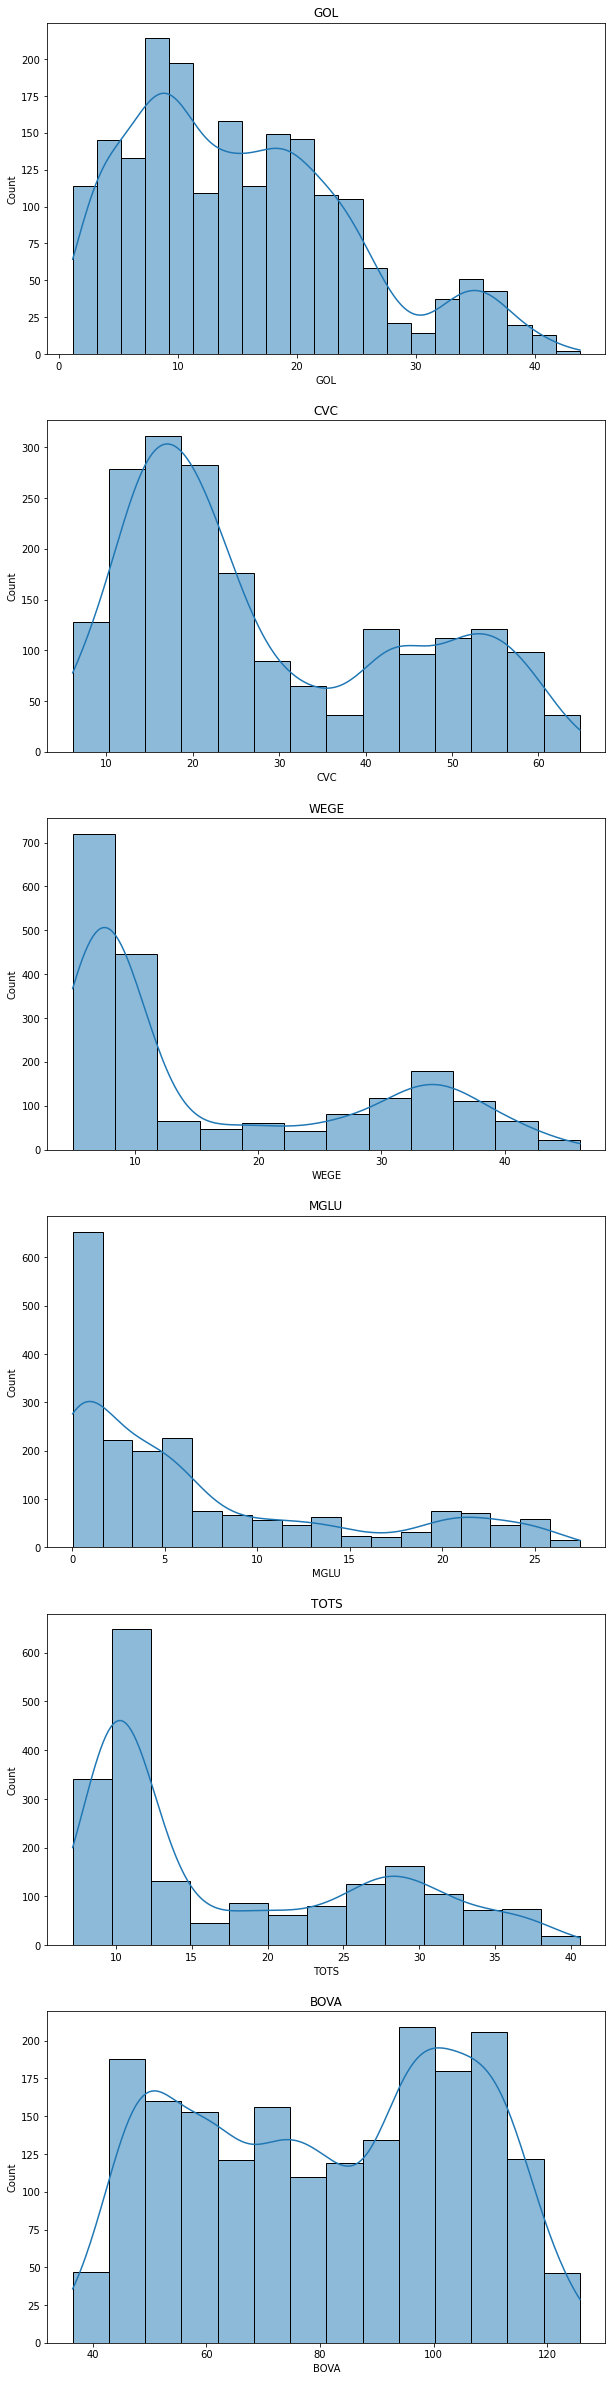

In [44]:
#Ações de todas as empresas
plt.figure(figsize=(10,50))
i = 1
for i in np.arange(1, len(acoes_df.columns)):
  plt.subplot(7, 1, i + 1)
  sns.histplot(acoes_df[acoes_df.columns[i]], kde = True)
  plt.title(acoes_df.columns[i])

In [28]:
acoes_df['GOL'].describe()

count    1951.000000
mean       15.453316
std         9.360926
min         1.160000
25%         7.955000
50%        14.210000
75%        21.200001
max        43.790001
Name: GOL, dtype: float64

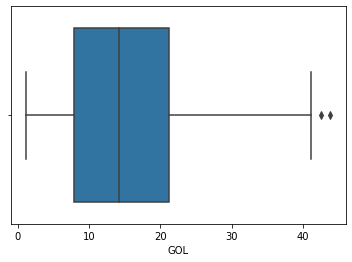

In [45]:
sns.boxplot(x = acoes_df['GOL']); #Boxplot da ação da Gol

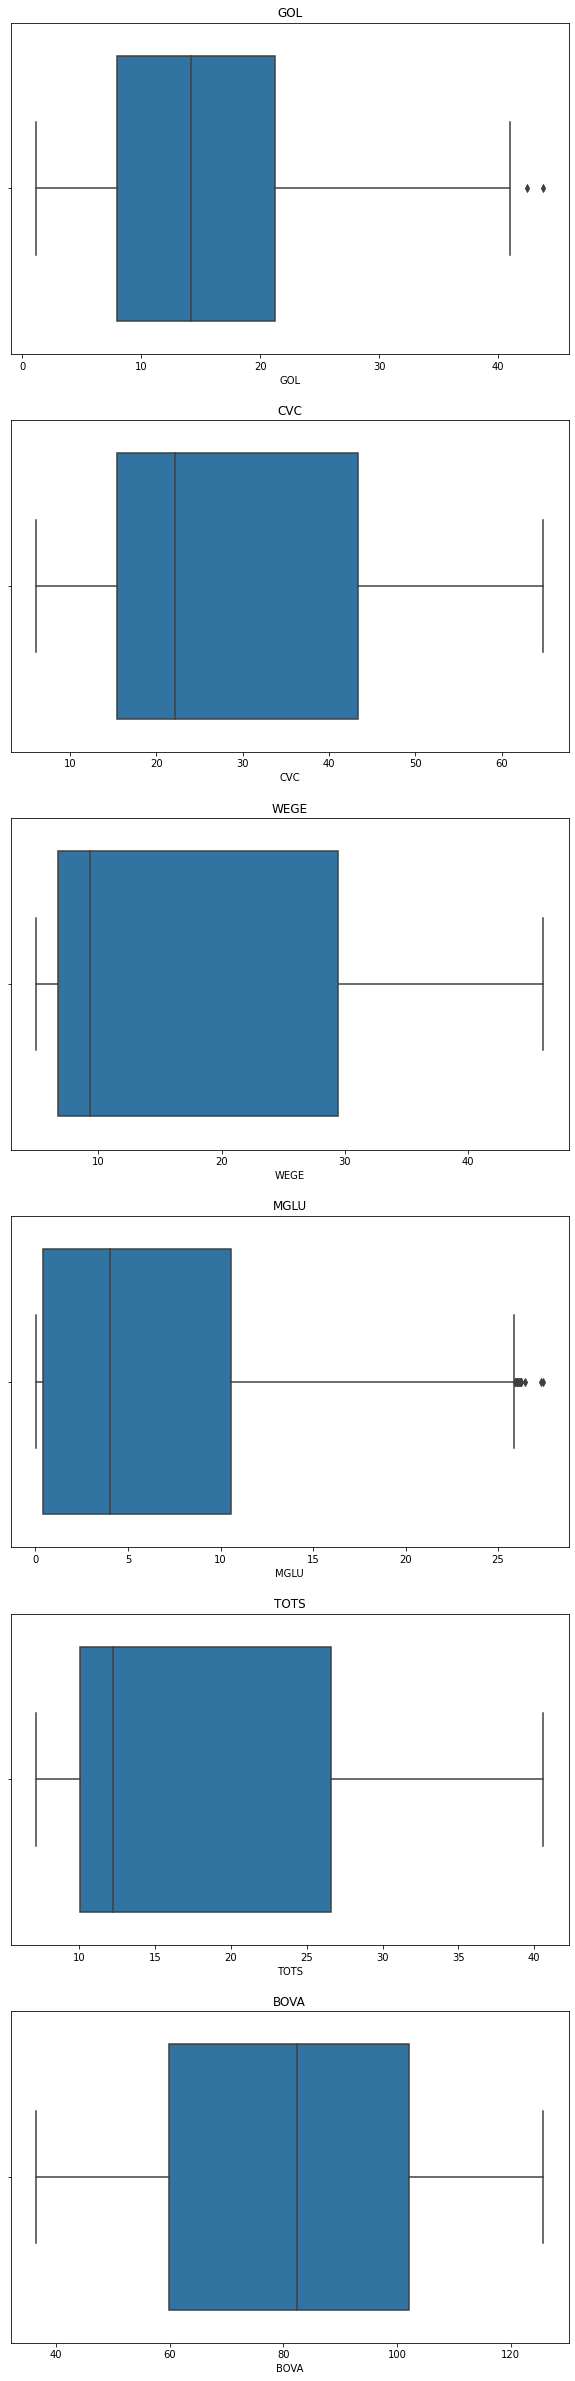

In [46]:
#Boxplot de todas as ações
plt.figure(figsize=(10,50))
i = 1
for i in np.arange(1, len(acoes_df.columns)):
  plt.subplot(7, 1, i + 1)
  sns.boxplot(x = acoes_df[acoes_df.columns[i]])
  plt.title(acoes_df.columns[i])

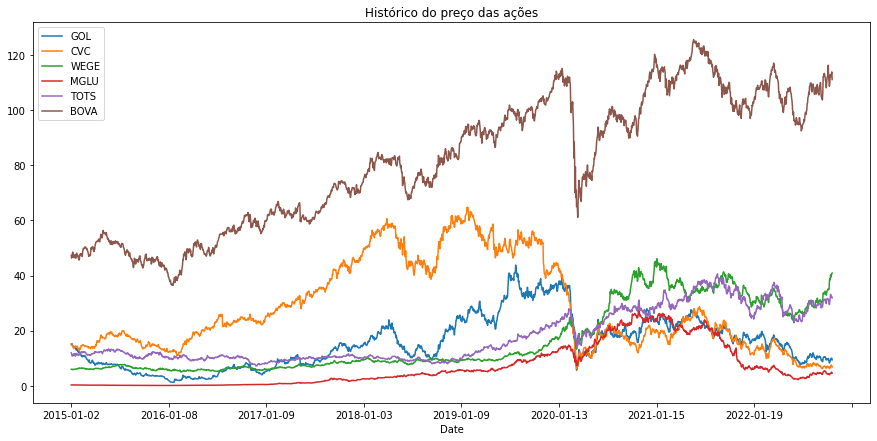

In [47]:
acoes_df.plot(x = 'Date', figsize = (15,7), title = 'Histórico do preço das ações'); #Gráfico em linha do histórico do preço de cada ação

Normalização - Ganho real

In [32]:
acoes_df

,Date,GOL,CVC,WEGE,MGLU,TOTS,BOVA
0,2015-01-02,14.99,15.20,5.923076,0.232812,11.910702,47.259998
1,2015-01-05,14.85,15.00,5.963461,0.237187,11.544731,46.320000
2,2015-01-06,15.21,14.80,5.875000,0.234062,10.822770,46.580002
3,2015-01-07,14.55,14.67,5.807692,0.241875,10.746248,48.150002
4,2015-01-08,14.27,14.15,5.905769,0.240000,10.995774,48.509998
...,...,...,...,...,...,...,...
1946,2022-10-31,9.61,7.17,40.279999,4.470000,33.160000,112.150002
1947,2022-11-01,9.90,7.41,39.410000,4.560000,32.110001,112.809998
1948,2022-11-03,9.93,7.44,40.200001,4.870000,32.330002,113.099998
1949,2022-11-04,9.95,7.23,40.799999,4.830000,32.410000,114.000000


In [48]:
#Criação de cópia para normalização
acoes_df_normalizado = acoes_df.copy()
for i in acoes_df_normalizado.columns[1:]:
  acoes_df_normalizado[i] = acoes_df_normalizado[i] / acoes_df_normalizado[i][0]

In [34]:
acoes_df_normalizado

,Date,GOL,CVC,WEGE,MGLU,TOTS,BOVA
0,2015-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2015-01-05,0.990660,0.986842,1.006818,1.018792,0.969274,0.980110
2,2015-01-06,1.014676,0.973684,0.991883,1.005369,0.908659,0.985612
3,2015-01-07,0.970647,0.965132,0.980520,1.038928,0.902235,1.018832
4,2015-01-08,0.951968,0.930921,0.997078,1.030875,0.923184,1.026449
...,...,...,...,...,...,...,...
1946,2022-10-31,0.641094,0.471711,6.800520,19.200040,2.784051,2.373043
1947,2022-11-01,0.660440,0.487500,6.653637,19.586619,2.695895,2.387008
1948,2022-11-03,0.662442,0.489474,6.787014,20.918165,2.714366,2.393144
1949,2022-11-04,0.663776,0.475658,6.888312,20.746353,2.721082,2.412188


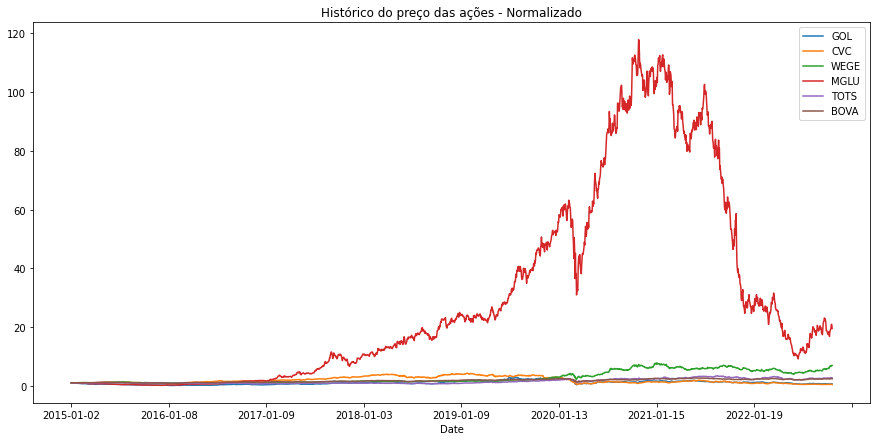

In [49]:
acoes_df_normalizado.plot(x = 'Date', figsize = (15,7), title = 'Histórico do preço das ações - Normalizado'); #Histórico das ações - normalizado com real valor de ganho por cada ação

In [50]:
#Histórico dos preços das ações em info-gráfico
figura = px.line(title = 'Histórico do preço das ações')
for i in acoes_df.columns[1:]:
  figura.add_scatter(x = acoes_df['Date'], y = acoes_df[i], name = i)
figura.show()

In [37]:
figura = px.line(title = 'Histórico do preço das ações - Normalizado')
for i in acoes_df.columns[1:]:
  figura.add_scatter(x = acoes_df_normalizado['Date'], y = acoes_df_normalizado[i], name = i)
figura.show()